<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab3_2_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Завантаження даних
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Виведення перших 5 рядків
print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


1. Провести попередній аналіз даних за схемою (дивиться вище).



Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Статистичний опис даних:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.00

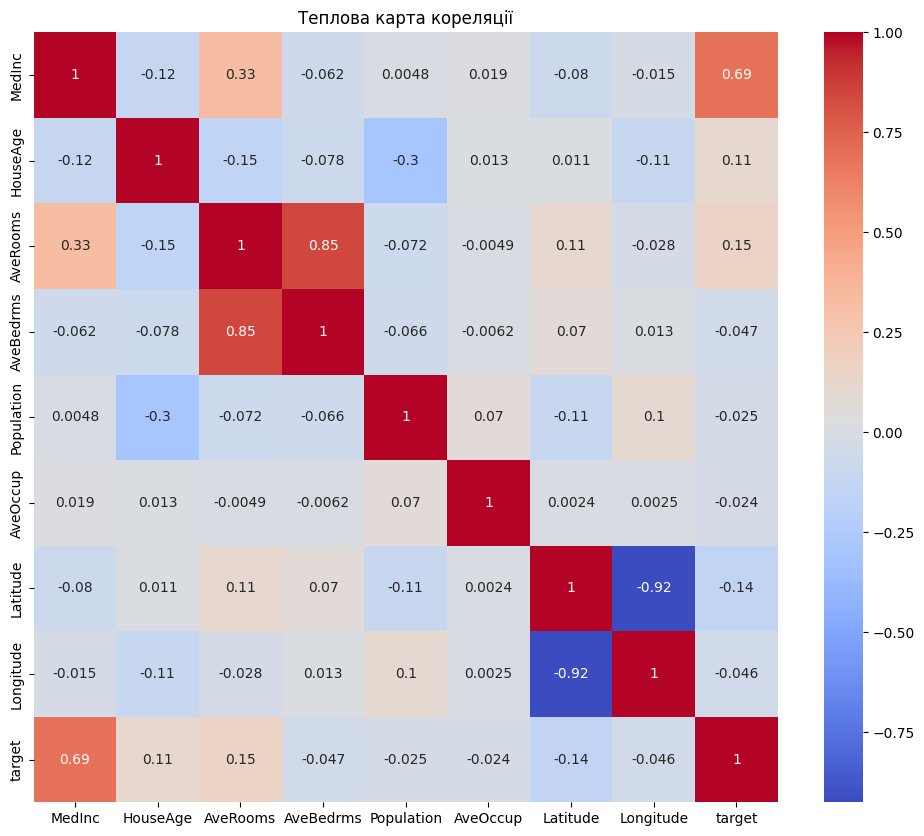

In [2]:
print("\nІнформація про датасет:")
print(df.info())

print("\nСтатистичний опис даних:")
print(df.describe())

print("\nКількість пропущених значень:")
print(df.isnull().sum())

print("\nКількість дублікатів:", df.duplicated().sum())

# Кореляційна матриця
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()

2. Масштабувати ознаки.

In [3]:
scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']
X_scaled = scaler.fit_transform(X)


3. Поділити дані на тренувальні і тестові.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.

In [5]:
# Лінійна регресія
lr = LinearRegression()
lr.fit(X_train, y_train)

# random foresst
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5)
rf.fit(X_train, y_train)

# Ridge регресія
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge = GridSearchCV(Ridge(random_state=42), ridge_params, cv=5)
ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.1, 1.0, 10.0]})

5. Вивести R2 I MSE. Побудувати графіки.


Linear Regression:
R2 score: 0.5758
MSE: 0.5559


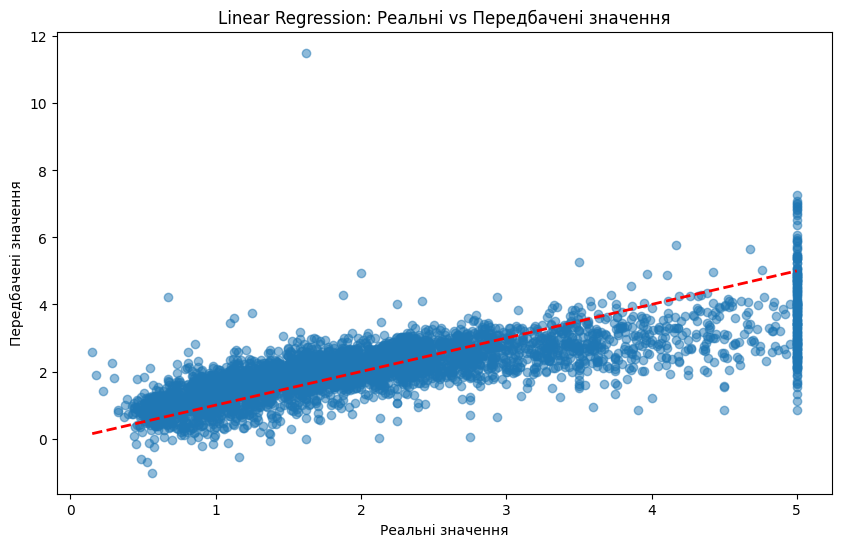


Random Forest:
R2 score: 0.8066
MSE: 0.2535


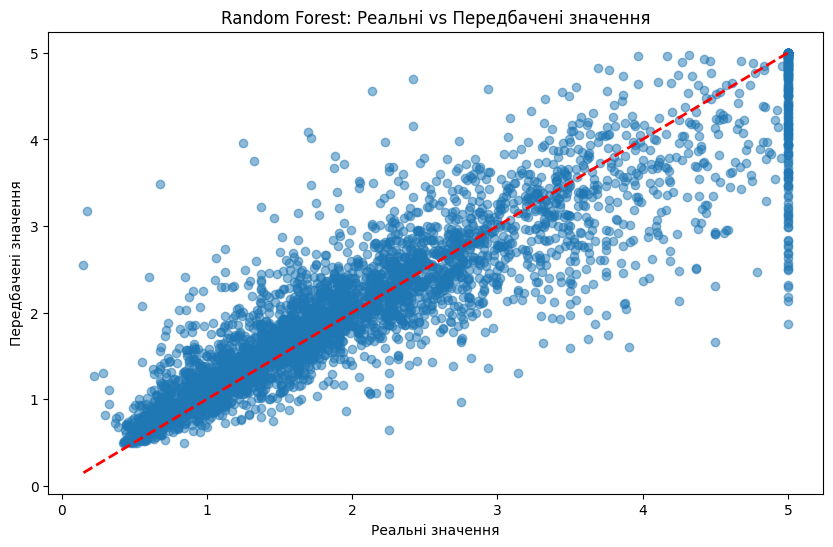


Ridge:
R2 score: 0.5758
MSE: 0.5559


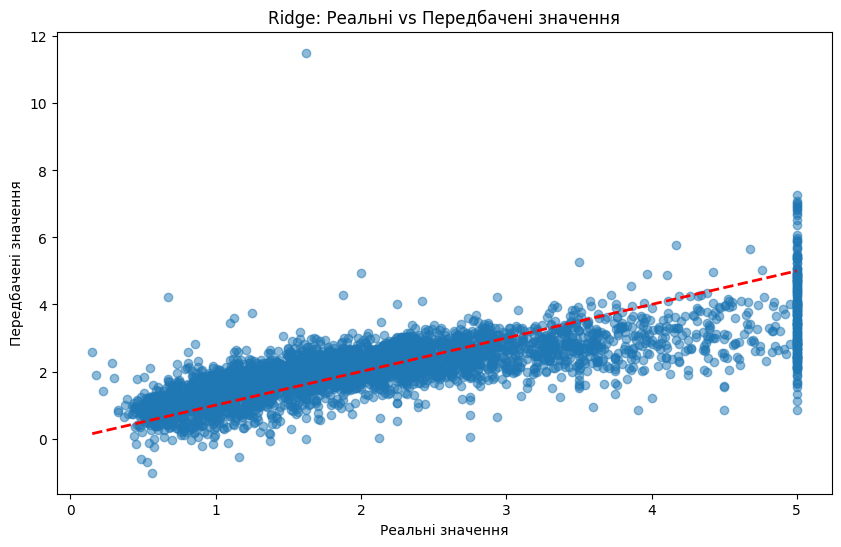


Найкращі параметри для Random Forest:
{'max_depth': None, 'n_estimators': 300}

Найкращі параметри для Ridge:
{'alpha': 0.1}


In [6]:
models = [('Linear Regression', lr), ('Random Forest', rf.best_estimator_), ('Ridge', ridge.best_estimator_)]

for name, model in models:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\n{name}:")
    print(f"R2 score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Реальні значення')
    plt.ylabel('Передбачені значення')
    plt.title(f'{name}: Реальні vs Передбачені значення')
    plt.show()

print("\nНайкращі параметри для Random Forest:")
print(rf.best_params_)
print("\nНайкращі параметри для Ridge:")
print(ridge.best_params_)

**На основі аналізу California Housing Dataset можна зробити наступні висновки:** модель Random Forest показала найкращі результати з R2 score 0.8066 та MSE 0.2535, значно перевершивши лінійну та Ridge регресії (обидві з R2 0.5758 та MSE 0.5559). Це вказує на наявність складних нелінійних взаємозв'язків у даних, які Random Forest краще вловлює. Оптимальні параметри для Random Forest (max_depth=None, n_estimators=300) свідчать про користь від глибоких дерев та великої кількості естиматорів. Для Ridge регресії оптимальне alpha=0.1 вказує на незначну потребу в регуляризації. Однакові результати лінійної та Ridge регресій говорять про відсутність критичної мультиколінеарності. Для прогнозування цін на житло в Каліфорнії рекомендується використовувати модель Random Forest через її вищу точність. Подальші покращення можливі через застосування інших нелінійних моделей, створення нових ознак або аналіз важливості факторів у Random Forest для глибшого розуміння впливу різних характеристик на ціни житла
